## Meu primeiro projeto para extração e limpeza de um Dataset 👀

### Importando as Bibliotecas

In [20]:
# carregar pacotes e bibliotecas e verificar sua respectivas versões

import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('A versão do Python é {}.\n'.format(sys.version))
print('A versão do numpy é {}.\n'.format(np.__version__))
print('Versão do pandas {}.\n'.format(pd.__version__))
print('Versão do matplotlib {}.\n'.format(mpl.__version__))
print('Versão do Scikit-Learn  {}.\n'.format(sklearn.__version__))

A versão do Python é 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)].

A versão do numpy é 1.20.3.

Versão do pandas 1.3.2.

Versão do matplotlib 3.4.2.

Versão do Scikit-Learn  0.24.2.



### Apontando o local do arquivo e convertendo em um DataFrame

In [21]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [22]:
# examinando o número de linhas e colunas com o método shape
df.shape

(30000, 25)

In [26]:
# informações de todas as colunas e primeiras linhas do DataFrame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [28]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
# Verificando quantas entradas exclusivas temos na coluna 'ID'
df['ID'].nunique()

29687

In [31]:
# Verificando as dimensões do dataset
# Note que o número de ID's Exclusivos é menor que o número de linhas, é possível que haja uma duplicação.
df.shape

(30000, 25)

In [32]:
# vamos listar os ID's exclusivos e com que frequencia eles ocorrem, ems eguida armazenar em uma variável.
# o método 'head()' por padrão retorna apenas as 5 primeiros linhas, mas podemos alterar isso nos parênteses 
id_counts = df['ID'].value_counts()
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

In [34]:
# exibindo entradas duplicadas
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [36]:
# usando numpy para gerar numeros aleatórios juntamente com 'seed' para ter dados consistentes
np.random.seed(seed=24)

In [39]:
# gerando inteiros aleatótios
random_integers = np.random.randint(low=1, high=5, size=100)
random_integers[:5]

array([2, 2, 4, 3, 1])

In [43]:
# mascara Booleana
is_equal_to_2 = random_integers == 2
is_equal_to_2[:5]

array([ True,  True, False, False, False])

In [44]:
sum(is_equal_to_2)

26

In [46]:
# atribuindo as ID's duplicadas a uma variável e exibindo os 5 primeiros elementos
# a variável criada é uma máscara lógica para guardar valores booleanos
dupe_mask = id_counts ==2
dupe_mask[0:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [47]:
# Acessando o indice de 'id_counts'
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

In [48]:
# armazenando os ID's duplicados em uma nova variavel
# em seguida convertendo em uma lista e obtendo o seu tamanho
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [49]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [50]:
# filtrando o dataframe e em seguida excluir as duplicatas com valor 0
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# criando uma matriz booleana
df_zero_mask = df ==0

In [53]:
# criando uma série booleana e somando-a
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

##### A saída acima diz que 315 linhas tem zeros para cada coluna exceto a primeira.
##### Se excluirmos todas as 'linhas de zero' podemos nos livrar do problema de ID's duplicados

In [54]:
# Efetuando a limpeza e criando uma cópia do dataframe em uma nova variável
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [55]:
# verificando número de linhas e clunas do novo dataframe
df_clean_1.shape

(29685, 25)

In [56]:
df_clean_1['ID'].nunique()

29685

## 2-Explorando e limpando os dados

### Desenvolvendo modelo Preditivo

In [57]:
# obtendo metadados
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

#### Note que na saída acima temos ID como string(esperado) e PAY_1 como objeto(inesperado)
#### Iremos analisar...


In [59]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [60]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

#### Na saída anterior temos valores não documentados; 0 e -2 e a razão dessa coluna ter sido importada como dado 'object' e não como inteiro(int64) é que há uma coluna 'Not available' representando dados ausentes. Iremos tratar isso logo mais...

In [61]:
# Utilizando mascara lógica
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [62]:
# verificando quantas linhas não contem dados ausentes
sum(valid_pay_1_mask)

26664

#### Note que temos 26664 linhas com valores 'Not available'. ou seja: tinhamos 3021 linhas com esse valor. E já que  29685-3021= 26664, isso está correto. Agora iremos limpar os dados eliminando as linhas com valores ausentes e em seguidaobter a dimensão dos novos dados.

In [64]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [65]:
df_clean_2.shape

(26664, 25)

In [66]:
# verificando se de fato os valores ausentes foram removidos
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [69]:
# convertendo de 'object' para 'int64' usando .astype
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


### Visualização dos dados

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

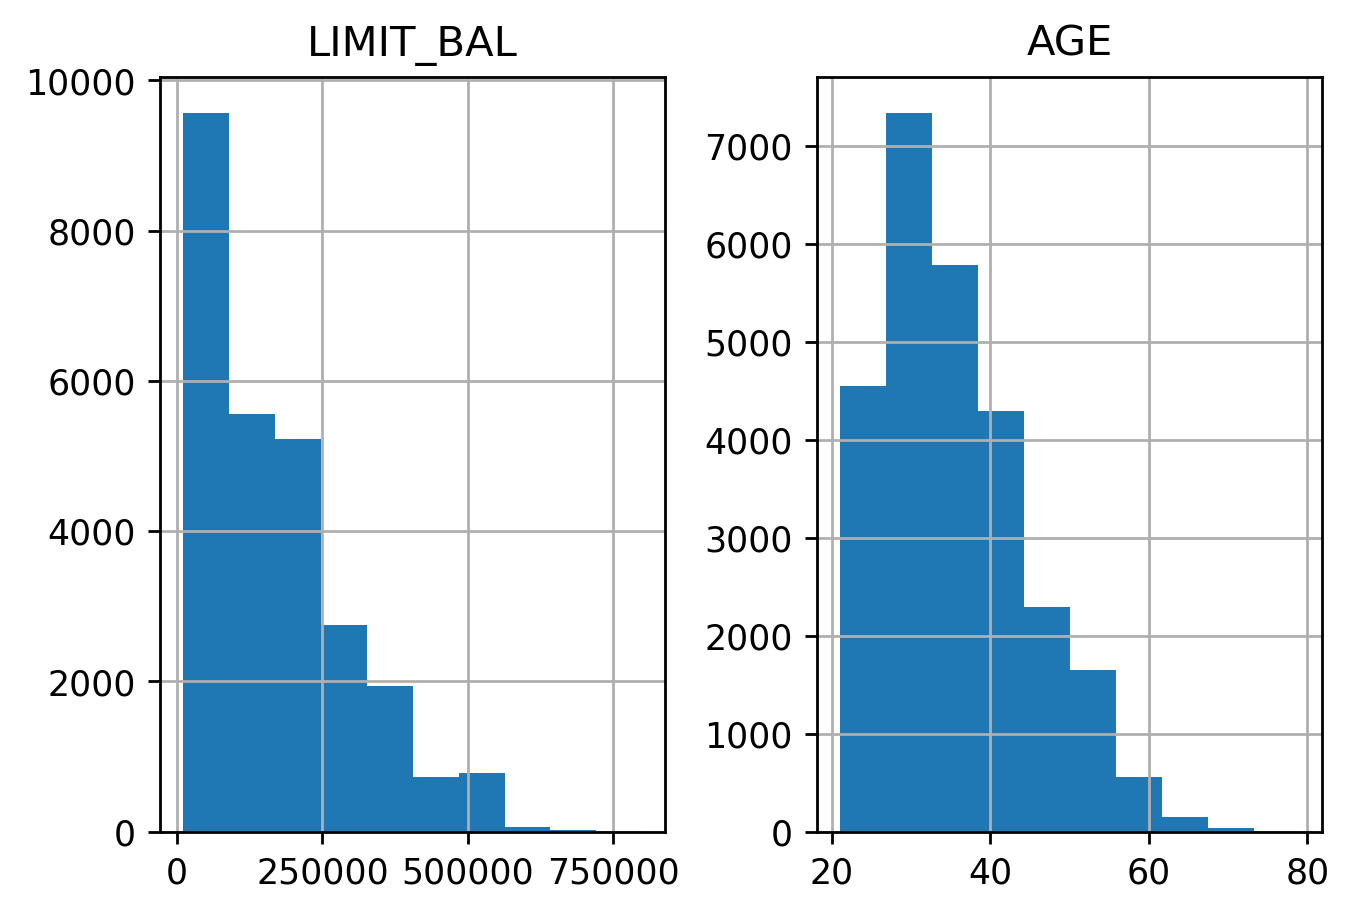

In [73]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [75]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [76]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [77]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [79]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

### basicamente o que fizemos aqui foi pegar o grau de instrução não documentada (0, 5, 6) e agrupá-los dentro de 'outros' com valor=4 utilizando o método replace porém sem retornar um novo dataframe. faremos isso com os demais valores na tabela para verificar se há inconsistências. veja a seguir;

In [80]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [81]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)

In [83]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

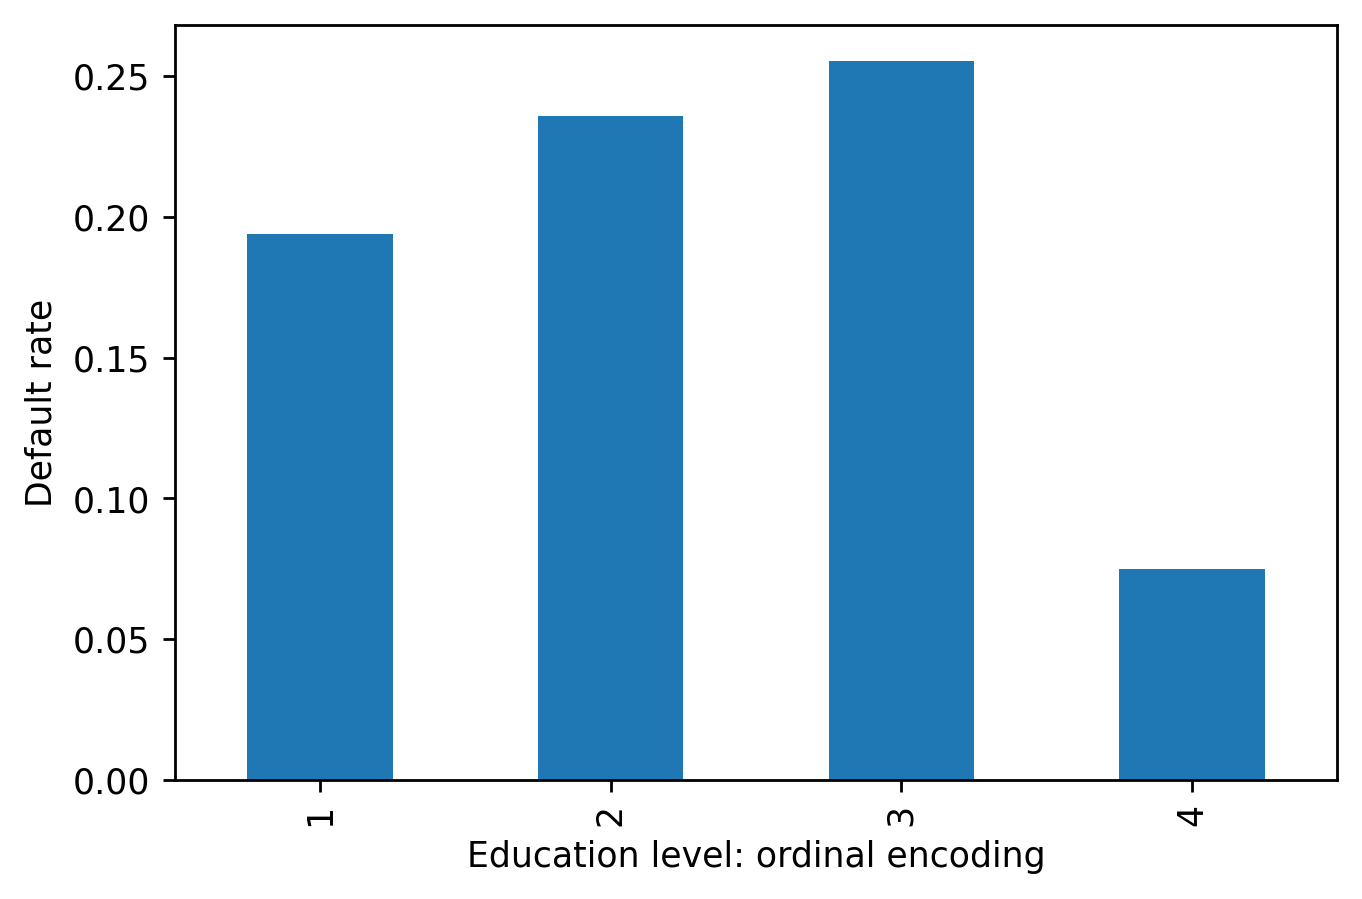

In [84]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')


#### Podemos atribuir o gráfico acima á taxa de inadimplência dentro do grau de instrução.

## Implementando o OHE(codificação one-hot) para caracteristicas catégoricas usando o Pandas.

### Aqui executaremos uma 'engenharia reversa' na categoria EDUCATION para obter rótulos de texto que representam os diferentes graus de instrução.

In [85]:
# criando uma coluna vazia para os rótulos catégoricos
df_clean_2['EDUCATION_CAT'] = 'none'

In [86]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


##### Agora iremos preencher a coluna 'EDUCATION_CAT'  com as strings apropriadas vindas da caracteristica 'EDUCATION'
#### Para isso faremos o mapeamento criando um dicionário para descrever a categoria e usando a função .map(). 

In [87]:
# criando um dicionário com cada chave representando uma instrução de educação
cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
    
}

In [89]:
# Aplicando mapeamento à coluna 'EDUCATION' original usando .map() e atribuindo os valores à nova coluna
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


### Criando um DataFrame OHE

In [90]:
# criando um DataFrame usando o função get_dummies() do pandas
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [91]:
# Realizando concatenação entre dataframes usando a função 'concat' do pandas
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
            'high school', 'university', 'others']].head(10)


,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [92]:
df_with_ohe.to_csv('Capitulo_1_arquivo_limpo.csv', index=False)

## Isso encerra o processo de limpeza do nosso Dataset mas ainda temos mais tarefas pela frente!!